In [1]:
#Shishir Khanal
# July 12, 2025
# Baseline Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.datasets import load_basic_motions

In [5]:
X_train,y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test,y_test = load_basic_motions(split='test', return_type='numpy3D')

In [7]:
print(X_train.shape)
print(X_test.shape)

(40, 6, 100)
(40, 6, 100)


In [8]:
# 40 individual time series
# 6 features
# 100 time steps of observation

In [9]:
y_train

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

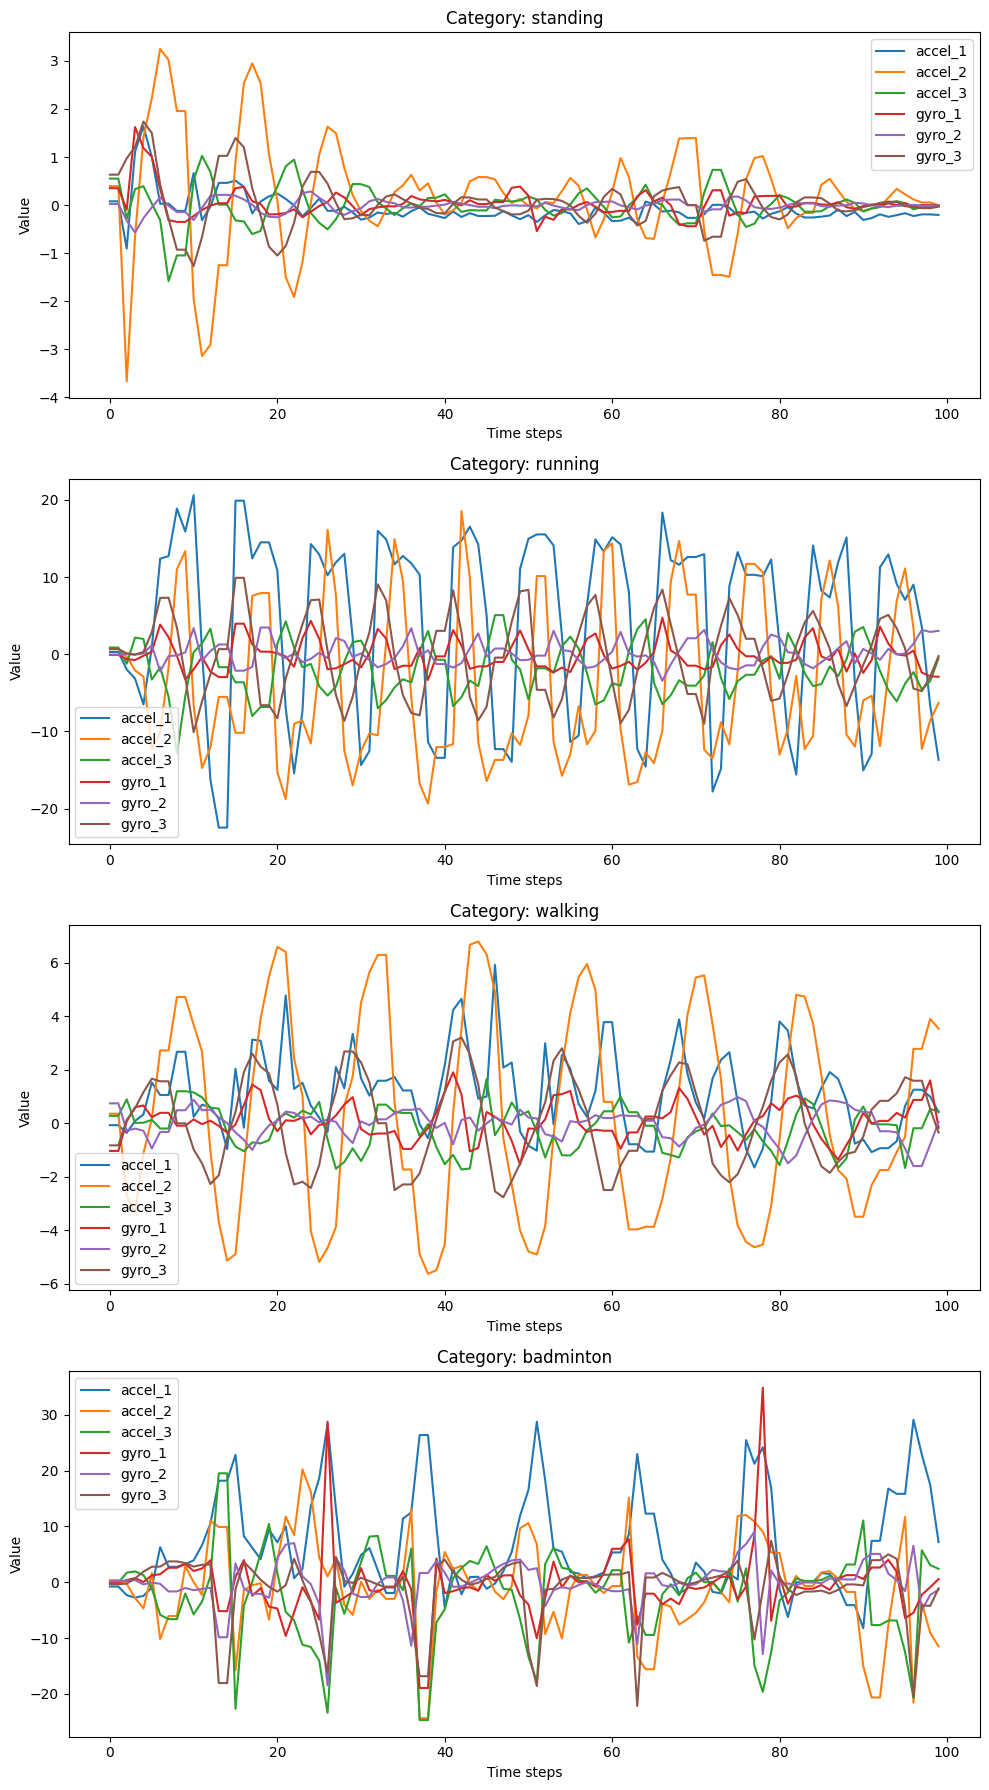

In [12]:
series_indices = [0, 10, 20, 30]
categories = ['standing','running','walking','badminton']
features = ['accel_1','accel_2','accel_3','gyro_1','gyro_2','gyro_3']

selected_series = X_train[series_indices]

fig,axes = plt.subplots(4,1,figsize=(10,18))

for i in range(4):
    for j in range(selected_series.shape[1]): # # of features/series
        axes[i].plot(selected_series[i,j], label=features[j])

    axes[i].set_title(f'Category: {categories[i]}')
    axes[i].set_xlabel('Time steps')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()

In [14]:
#Baseline Classifier
from sktime.classification.dummy import DummyClassifier

clf = DummyClassifier(strategy='stratified',random_state=42)

#Fit classifier
clf.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [15]:
#Predict
y_pred = clf.predict(X_test) #Baseline Prediction

In [16]:
#Measure accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.225

In [17]:
#Test all baseline classifier strategies
strategies = ['most_frequent','prior','stratified','uniform']

accuracy_scores = []

for strategy in strategies:
    clf = DummyClassifier(strategy=strategy, random_state=42)
    clf.fit(X_train,y_train)
    preds = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,preds))


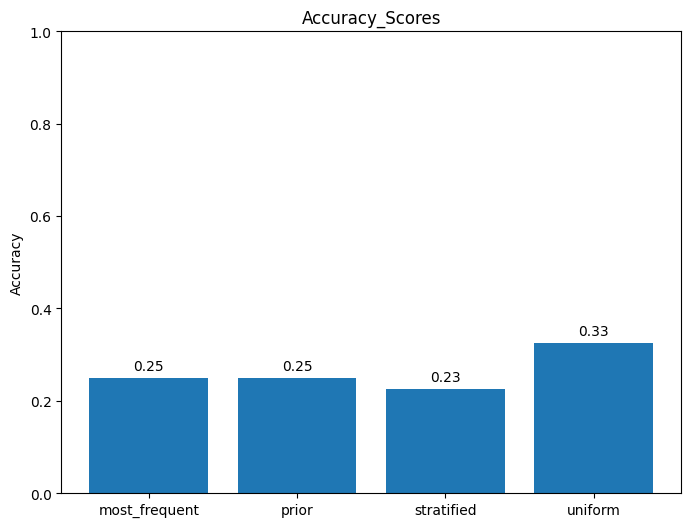

In [19]:
fig,ax = plt.subplots(figsize=(8,6))

bars = ax.bar(range(len(accuracy_scores)), accuracy_scores)

for bar,score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}',ha='center', va='bottom')

ax.set_label('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy_Scores')
ax.set_ylim(0, 1)
ax.set_xticks(range(len(accuracy_scores)), strategies)